I am starting my project with importing packages.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

Next, let's have an overview of the first dataframe from the dataset.

In [4]:
data1 = pd.read_csv("sleep-data/sleepdata.csv", sep = ";")
data1.head()

,Start,End,Sleep quality,Time in bed,Wake up,Sleep Notes,Heart rate,Activity (steps)
0,2014-12-29 22:57:49,2014-12-30 07:30:13,100%,8:32,:),NaN,59.0,0
1,2014-12-30 21:17:50,2014-12-30 21:33:54,3%,0:16,:|,Stressful day,72.0,0
2,2014-12-30 22:42:49,2014-12-31 07:13:31,98%,8:30,:|,NaN,57.0,0
3,2014-12-31 22:31:01,2015-01-01 06:03:01,65%,7:32,NaN,NaN,NaN,0
4,2015-01-01 22:12:10,2015-01-02 04:56:35,72%,6:44,:),Drank coffee:Drank tea,68.0,0


In [5]:
print("Total number of inputs for dataframe 1:", len(data1))

Total number of inputs for dataframe 1: 887


In [6]:
data1.describe()

,Heart rate,Activity (steps)
count,162.000000,887.000000
mean,60.604938,2776.378805
std,7.102933,3486.482157
min,49.000000,0.000000
25%,57.000000,0.000000
50%,60.000000,255.000000
75%,64.000000,5317.000000
max,98.000000,21870.000000


Now move on to the second one.

In [7]:
data2 = pd.read_csv("sleep-data/sleepdata_2.csv", sep = ";")
data2.head()

,Start,End,Sleep Quality,Regularity,Mood,Heart rate (bpm),Steps,Alarm mode,Air Pressure (Pa),City,...,Time in bed (seconds),Time asleep (seconds),Time before sleep (seconds),Window start,Window stop,Did snore,Snore time,Weather temperature (°C),Weather type,Notes
0,2019-05-12 23:26:13,2019-05-13 06:11:03,60%,0%,NaN,0,8350,Normal,NaN,NaN,...,24289.2,22993.8,161.9,2019-05-13 06:00:00,2019-05-13 06:00:00,True,92.0,0.0,No weather,NaN
1,2019-05-13 22:10:31,2019-05-14 06:10:42,73%,0%,NaN,0,4746,Normal,NaN,NaN,...,28810.2,25160.9,192.1,2019-05-14 05:50:00,2019-05-14 05:50:00,True,0.0,0.0,No weather,NaN
2,2019-05-14 21:43:00,2019-05-15 06:10:41,86%,96%,NaN,0,4007,Normal,NaN,NaN,...,30461.5,28430.8,203.1,2019-05-15 05:50:00,2019-05-15 05:50:00,True,74.0,0.0,No weather,NaN
3,2019-05-15 23:11:51,2019-05-16 06:13:59,77%,92%,NaN,0,6578,Normal,NaN,NaN,...,25327.6,23132.5,168.9,2019-05-16 05:50:00,2019-05-16 05:50:00,True,0.0,0.0,No weather,NaN
4,2019-05-16 23:12:13,2019-05-17 06:20:32,78%,94%,NaN,0,4913,Normal,NaN,NaN,...,25698.4,22614.6,171.3,2019-05-17 05:50:00,2019-05-17 05:50:00,True,188.0,0.0,No weather,NaN


In [8]:
print("Total number of inputs for dataframe 2:", len(data2))

Total number of inputs for dataframe 2: 921


Total number of inputs for dataframe 2: 921

In [9]:
data2.describe()

,Mood,Heart rate (bpm),Steps,Air Pressure (Pa),Movements per hour,Time in bed (seconds),Time asleep (seconds),Time before sleep (seconds),Snore time,Weather temperature (°C)
count,0.0,921.0,921.000000,492.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000
mean,NaN,0.0,5311.599349,68.660163,174.277416,27505.497611,23912.683170,1001.556135,312.944300,2.142562
std,NaN,0.0,4396.822762,41.845368,822.776299,3916.696288,4066.189356,1046.287777,455.472848,6.324558
min,NaN,0.0,0.000000,0.000000,0.000000,1852.800000,0.000000,0.000000,0.000000,-19.000000
25%,NaN,0.0,2299.000000,0.000000,37.000000,25500.600000,21627.500000,449.900000,0.000000,0.000000
50%,NaN,0.0,4245.000000,93.700000,49.600000,27422.900000,23919.000000,563.700000,148.000000,0.000000
75%,NaN,0.0,7452.000000,94.400000,65.200000,29530.100000,26257.000000,1287.000000,440.000000,3.100000
max,NaN,0.0,38165.000000,96.500000,17926.700000,46703.400000,45769.400000,5677.700000,4477.300000,24.500000


There are common columns in the dataframe. I am renaming these common columns such that they share the same names.

In [10]:
data2 = data2.rename(columns = {"Time in bed (seconds)":"Time in bed", "Sleep Quality" : "Sleep quality"})
data1 = data1.rename(columns = {"Activity (steps)":"Steps"})

For the common column "Time in bed", dataframe 1 uses the hours and minutes unit, while dataframe 2 uses seconds. I will now write a function to convert the unit of "Time in bed" in dataframe 1 into seconds, and apply that function.

In [11]:
def to_seconds(val):
    hours, minutes = map(int, val.split(':'))
    return hours * 3600 + minutes * 60
data1["Time in bed"] = data1["Time in bed"].apply(to_seconds)

Now I will also convert the values in the "Sleep quality" column for both dataframe into integer values and do the same with the "Regularity" column in dataframe 2. I am doing this by first writing a function, then apply it to these columns.

In [12]:
def to_int(val):
    return int(val.strip('%'))

data1["Sleep quality"] = data1["Sleep quality"].apply(to_int)
data2["Sleep quality"] = data2["Sleep quality"].apply(to_int)
data2["Regularity"] = data2["Regularity"].apply(to_int)

Let's check if there are any duplicates in the dataframe 1 and dataframe 2.

In [13]:
dup1 = data1[data1.duplicated()]
print("Number of duplications for dataframe 1:", len(dup1))

Number of duplications for dataframe 1: 0


In [14]:
dup2 = data2[data2.duplicated()]
print("Number of duplications for dataframe 2:", len(dup2))

Number of duplications for dataframe 2: 0


There is no duplicates in either of the dataframes. I will now be checking the number of missing values in each column for dataframe 1.

In [15]:
data1.isnull().sum()

Start              0
End                0
Sleep quality      0
Time in bed        0
Wake up          641
Sleep Notes      235
Heart rate       725
Steps              0
dtype: int64

Since there are only 887 data inputs in total for dataframe 1, I will be dropping the columns in dataframe 1 that has too many missing values.

In [16]:
data_dropped1 = data1.drop(columns= ["Wake up", "Heart rate", "Sleep Notes"])

Amongst the inputs in dataframe 2, air pressure cannot be 0. This is explained in details in the report under section C. Dataset Description. Therefore, I will be replacing inputs with the values "0" in the "Air Pressure (Pa)" columns with NaN.

Heart rate should also not be 0, so I will be replacing the 0 inputs with NaN.

After that, I am checking the number of missing values in each column for dataframe 2.

In [17]:
data2["Heart rate (bpm)"] = data2["Heart rate (bpm)"].replace({'0':np.nan, 0:np.nan})
data2["Air Pressure (Pa)"] = data2["Air Pressure (Pa)"].replace({'0':np.nan, 0:np.nan})
data2.isnull().sum()

Start                            0
End                              0
Sleep quality                    0
Regularity                       0
Mood                           921
Heart rate (bpm)               921
Steps                            0
Alarm mode                       0
Air Pressure (Pa)              562
City                           434
Movements per hour               0
Time in bed                      0
Time asleep (seconds)            0
Time before sleep (seconds)      0
Window start                    80
Window stop                     80
Did snore                        0
Snore time                       0
Weather temperature (°C)         0
Weather type                     0
Notes                          912
dtype: int64

Since there are only 921 data inputs in total for dataframe 2, I will be dropping the columns in dataframe 2 that has too many missing values. The columns "Window start" and "Window stop" have missing values; however, since it is unclear what the data in these columns refers to, instead of simply dropping the missing values, I have decided to drop these columns entirely.

In [18]:
data_dropped2 = data2.drop(columns= ["Heart rate (bpm)", "Mood", "Notes", "Air Pressure (Pa)", "City", "Window start", "Window stop"])

In [19]:
print("Number of entries for dataframe 2 after dropping missing values:", len(data_dropped2))

Number of entries for dataframe 2 after dropping missing values: 921


We can see that both dataframes have some common columns. Therefore, it is possible to concatenate the dataframes to yield a bigger dataframe with more inputs. I then reset the index after concatenating the dataframes vertically.

In [20]:
col = ["Start", "End", "Sleep quality", "Time in bed", "Steps"]
data = pd.concat([data_dropped1[col], data_dropped2[col]], axis = 0) 
data.reset_index(inplace=True, drop=True) 
data.head()

,Start,End,Sleep quality,Time in bed,Steps
0,2014-12-29 22:57:49,2014-12-30 07:30:13,100,30720.0,0
1,2014-12-30 21:17:50,2014-12-30 21:33:54,3,960.0,0
2,2014-12-30 22:42:49,2014-12-31 07:13:31,98,30600.0,0
3,2014-12-31 22:31:01,2015-01-01 06:03:01,65,27120.0,0
4,2015-01-01 22:12:10,2015-01-02 04:56:35,72,24240.0,0


Let's see the number of entries we are having for this new dataframe.

In [21]:
print("Number of entries of the concatenated dataframe:", len(data))

Number of entries of the concatenated dataframe: 1808


In [22]:
data.isnull().sum()

Start            0
End              0
Sleep quality    0
Time in bed      0
Steps            0
dtype: int64

After double-checking, there is no missing values for this concatenated dataframe

In [23]:
dup = data[data.duplicated()]
print("Number of duplications for this dataframe:", len(dup))

Number of duplications for this dataframe: 0


Let's start data analysis with looking at dataframe 1. It would be interesting to see how certain factors during the day, such as the level of caffeine intake, or if the day was stressful, could have an impact on sleep quality. I will create a new dataframe from dataframe 1 where the values of the column "Sleep Notes" are processed such that a new column "Stressful day" that has binary input can be created; as well as a new column "Caffeine intake" to arbitrarily quantify amount of caffeine taken during the day. As per the explanation in the report, coffee usually contains 4 times the amount of caffeine in tea, I will assign tea "1" point and coffee "4".

In [24]:
df1 = data1.drop(columns= ["Wake up", "Heart rate", "Start", "End", "Time in bed", "Steps"])
df1.head()

,Sleep quality,Sleep Notes
0,100,NaN
1,3,Stressful day
2,98,NaN
3,65,NaN
4,72,Drank coffee:Drank tea


In [25]:
df1["Stressful day"] = df1["Sleep Notes"].str.contains("Stressful day", case=False, na=False).astype(int)
def caffeine(x):
    if "Drank coffee" in str(x) and "Drank tea" in str(x):
        return 5
    if "Drank coffee" in str(x):
        return 4
    if "Drank tea" in str(x):
        return 1
    else:
        return 0                                          
df1["Caffeine intake"] = df1["Sleep Notes"].apply(caffeine)
df1.head()

,Sleep quality,Sleep Notes,Stressful day,Caffeine intake
0,100,NaN,0,0
1,3,Stressful day,1,0
2,98,NaN,0,0
3,65,NaN,0,0
4,72,Drank coffee:Drank tea,0,5


Now that I have extracted the necessary data, let's drop the "Sleep Notes" column.

In [26]:
df1 =df1.drop(columns = "Sleep Notes")

I will now plot a histogram to see the distribution of sleep quality for stressful and non-stressful days

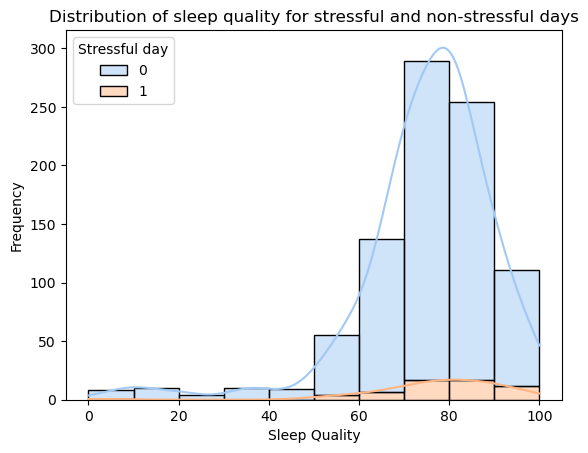

In [27]:
sns.histplot(data=df1, x="Sleep quality", hue="Stressful day", bins=10, kde=True, multiple="stack", palette="pastel")
plt.xlabel("Sleep Quality")
plt.ylabel("Frequency")
plt.title("Distribution of sleep quality for stressful and non-stressful days")
plt.savefig("Distribution of sleep quality for stressful and non-stressful days")

Let's look at the distribution of sleep quality for different caffeine intake levels

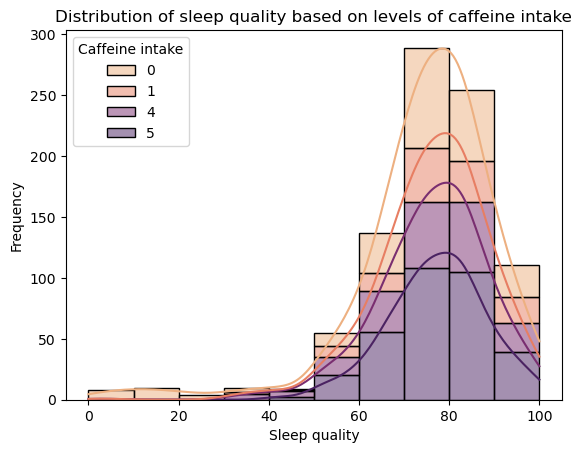

In [28]:
sns.histplot(data=df1, x="Sleep quality", hue="Caffeine intake", bins=10, kde=True, multiple="stack", palette="flare")
plt.xlabel("Sleep quality")
plt.ylabel("Frequency")
plt.title("Distribution of sleep quality based on levels of caffeine intake")
plt.savefig("Distribution of sleep quality based on levels of caffeine intake")

Now, let's move on to look at the dataframe 2.

In [29]:
print(f"Data type of each column of the dataframe 2:\n{data_dropped2.dtypes}")

Data type of each column of the dataframe 2:
Start                           object
End                             object
Sleep quality                    int64
Regularity                       int64
Steps                            int64
Alarm mode                      object
Movements per hour             float64
Time in bed                    float64
Time asleep (seconds)          float64
Time before sleep (seconds)    float64
Did snore                         bool
Snore time                     float64
Weather temperature (°C)       float64
Weather type                    object
dtype: object


For the time when the subject go to bed (values of the column "Start") to be useful for analysis, let's remove the date, as well as simplify the time into just the hours and the minutes as a decimal point. In other words, we are changing it such that the "Start" column's values are of type "float64" and are indicative of the hour in the day which the person go to sleep.

The values in the column "End" can be calculated with the values in the columns "Start" and "Time in bed", so I am dropping this column.

In [30]:
df2 = data_dropped2.drop(columns = "End")
df2["Start"] = pd.to_datetime(df2["Start"])
df2["Start"] = df2["Start"].dt.hour + df2["Start"].dt.minute / 60

For the column "Start", the time is recorded in the 24-hour format; therefore, if the subject goes to sleep at 1am, the value is registered as 1. However, this can cause the plotting to not be coherent. Hence I will be changing the values such at 1am is registered as 25, 2am is registered as 26, and so on all the way until 11am.

In [31]:
def change_time(val):
    if val < 12:
        return val+24
    else:
        return val

In [32]:
df2["Start"] = df2["Start"].apply(change_time)
df2.head()

,Start,Sleep quality,Regularity,Steps,Alarm mode,Movements per hour,Time in bed,Time asleep (seconds),Time before sleep (seconds),Did snore,Snore time,Weather temperature (°C),Weather type
0,23.433333,60,0,8350,Normal,35.0,24289.2,22993.8,161.9,True,92.0,0.0,No weather
1,22.166667,73,0,4746,Normal,78.6,28810.2,25160.9,192.1,True,0.0,0.0,No weather
2,21.716667,86,96,4007,Normal,60.5,30461.5,28430.8,203.1,True,74.0,0.0,No weather
3,23.183333,77,92,6578,Normal,45.2,25327.6,23132.5,168.9,True,0.0,0.0,No weather
4,23.200000,78,94,4913,Normal,44.6,25698.4,22614.6,171.3,True,188.0,0.0,No weather


In [33]:
weather_no = df2["Weather type"].str.contains("No weather", case=False, na=False).sum()
print(f"Number of values that contain 'No weather': {weather_no}")

Number of values that contain 'No weather': 488


We can see that for column "Weather typer", there are 488 entries with "No weather" value. This is a lot of missing data, so I will be removing this column.

In [34]:
df2 = df2.drop(columns = "Weather type")

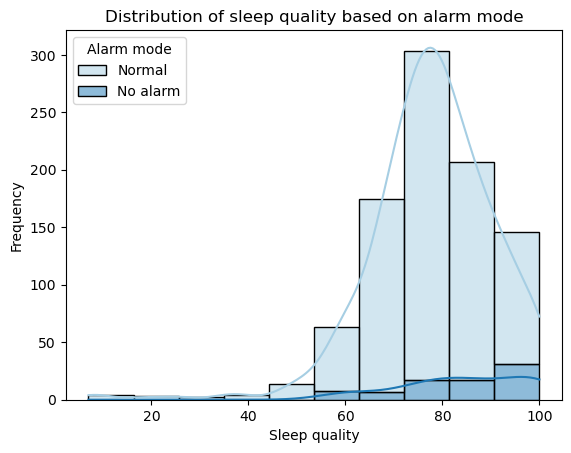

In [35]:
sns.histplot(data=df2, x="Sleep quality", hue="Alarm mode", bins=10, kde=True, multiple="stack", palette="Paired")
plt.xlabel("Sleep quality")
plt.ylabel("Frequency")
plt.title("Distribution of sleep quality based on alarm mode")
plt.savefig("Distribution of sleep quality based on alarm mode")

I will convert the values for the alarm mode from "Normal" to 1, and "No alarm" to 0.

In [36]:
df2["Alarm mode"] = df2["Alarm mode"].replace({"Normal": 1, "No alarm": 0})

For the "Did snore" column, there are discrepancies with the "Snore time" column. Even when the snore time is registered as 0.0, the "Did snore" value can still be True. I will be changing the "Did snore" value into False if the snore time is 0.0.

In [37]:
df2.loc[df2["Snore time"] == 0.0, "Did snore"] = False
df2.head()

,Start,Sleep quality,Regularity,Steps,Alarm mode,Movements per hour,Time in bed,Time asleep (seconds),Time before sleep (seconds),Did snore,Snore time,Weather temperature (°C)
0,23.433333,60,0,8350,1,35.0,24289.2,22993.8,161.9,True,92.0,0.0
1,22.166667,73,0,4746,1,78.6,28810.2,25160.9,192.1,False,0.0,0.0
2,21.716667,86,96,4007,1,60.5,30461.5,28430.8,203.1,True,74.0,0.0
3,23.183333,77,92,6578,1,45.2,25327.6,23132.5,168.9,False,0.0,0.0
4,23.200000,78,94,4913,1,44.6,25698.4,22614.6,171.3,True,188.0,0.0


Let's look at distribution of sleep quality for when the subject snores and not snores.

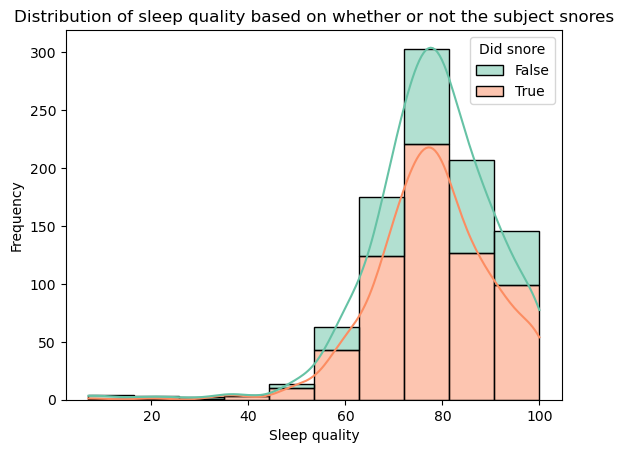

In [38]:
sns.histplot(data=df2, x="Sleep quality", hue="Did snore", bins=10, kde=True, multiple="stack", palette="Set2")
plt.xlabel("Sleep quality")
plt.ylabel("Frequency")
plt.title("Distribution of sleep quality based on whether or not the subject snores")
plt.savefig("Distribution of sleep quality based on whether or not the subject snores")

Then, I will look at the relationship between the features with Seaborn's pair plot.

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
/opt/software/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


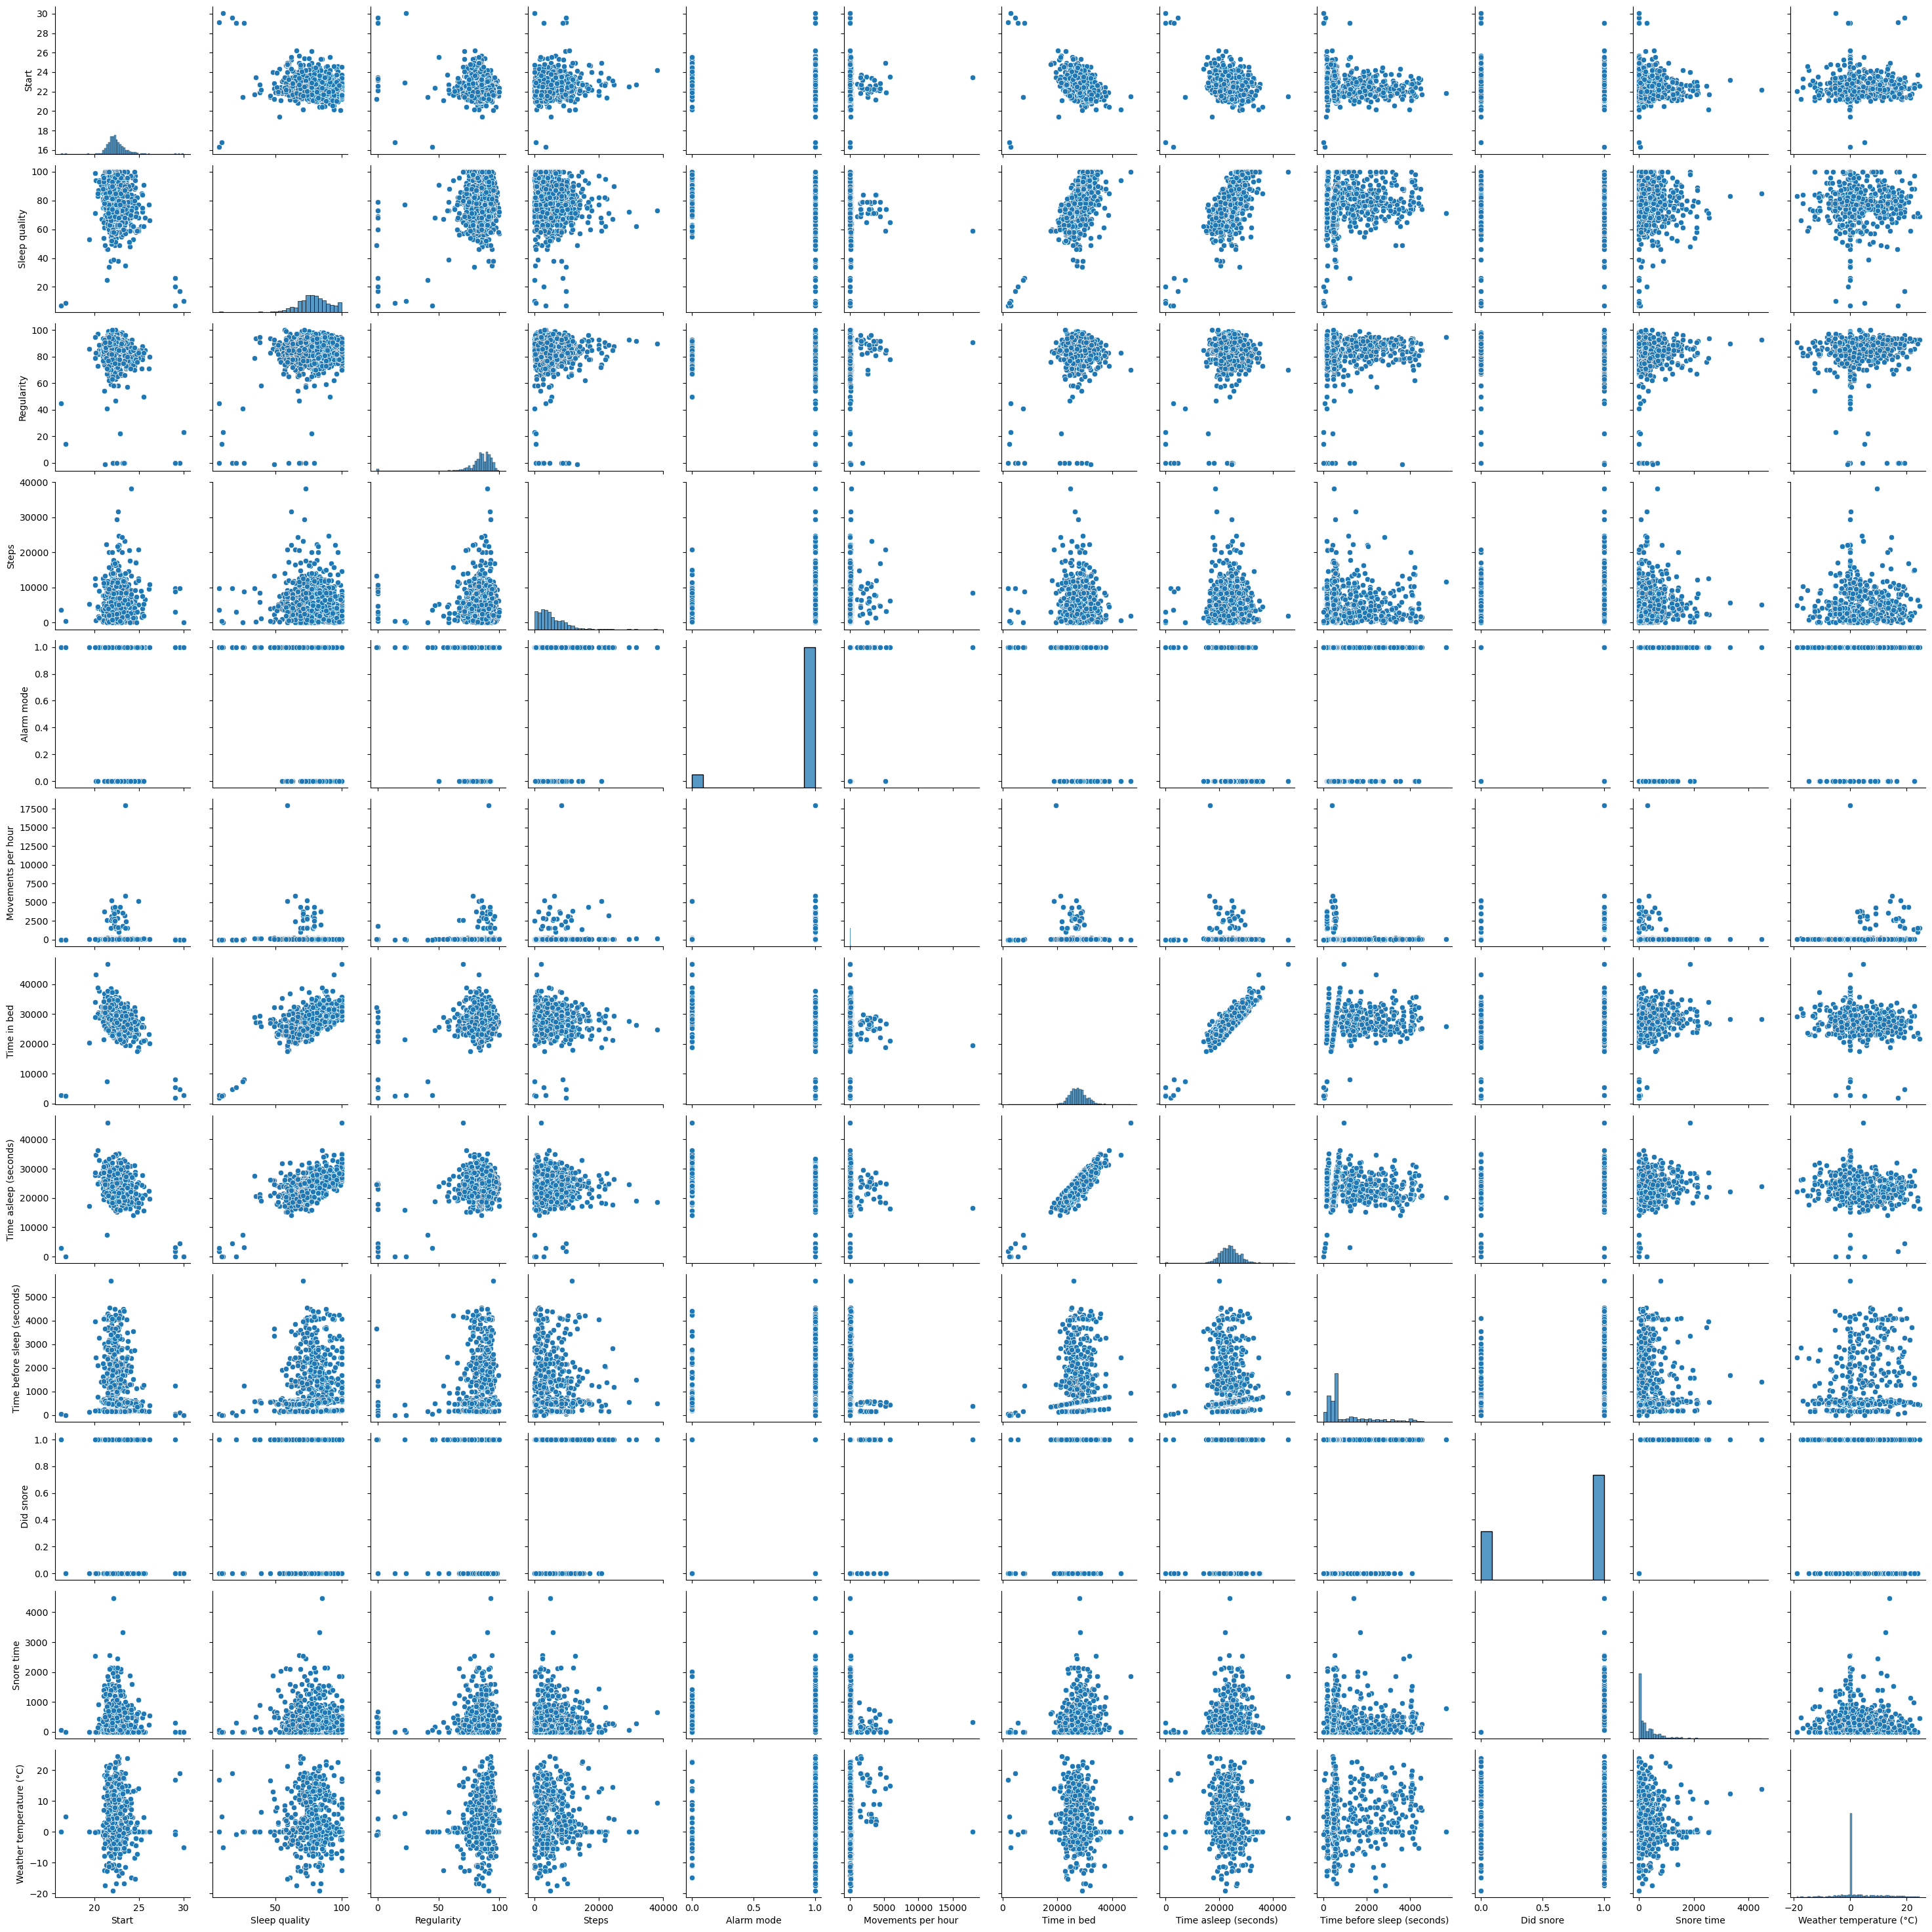

In [39]:
sns.pairplot(df2)
plt.savefig("Pair plot 2")

Next, I will be plotting a heatmap for the correlation matrix.

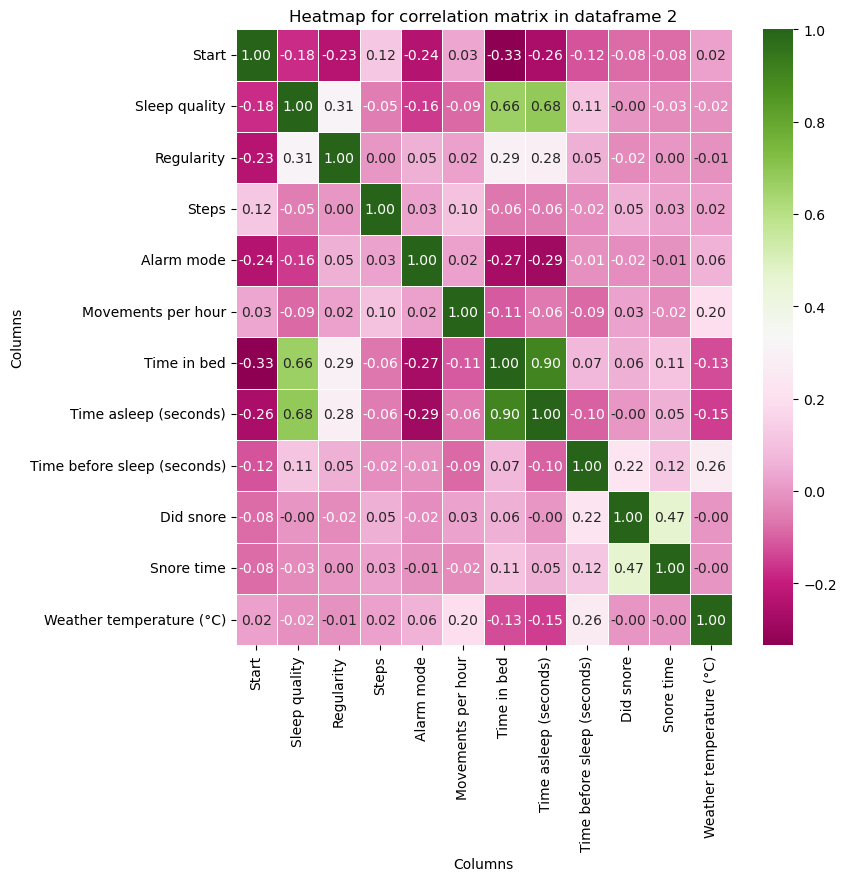

In [40]:
ig, ax = plt.subplots(figsize=(8,8))        
sns.heatmap(df2.corr(), annot=True, linewidths=.5, cmap = "PiYG", fmt = ".2f", ax=ax)
plt.xlabel("Columns")
plt.ylabel("Columns")
plt.title("Heatmap for correlation matrix in dataframe 2")
plt.savefig("Heatmap for correlation matrix 2")

Lastly, I will take a closer look at the concatenated dataframe. Let's first do the some similar data processing we have done for the dataframe 2.

In [41]:
data["Start"] = pd.to_datetime(data["Start"])
data["Start"] = data["Start"].dt.hour + data["Start"].dt.minute / 60
data = data.drop(columns = "End")
data["Start"] = data["Start"].apply(change_time)

Let's start data analysis with looking at the distribution of sleep quality.

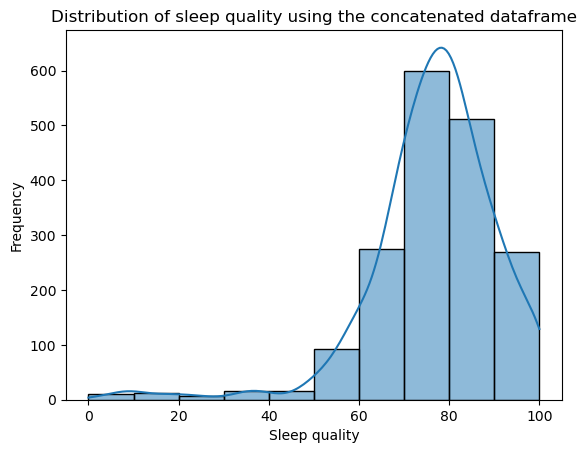

In [42]:
sns.histplot(data=data, x="Sleep quality", bins=10, kde=True)
plt.xlabel("Sleep quality")
plt.ylabel("Frequency")
plt.title("Distribution of sleep quality using the concatenated dataframe")
plt.savefig("Distribution of sleep quality using the concatenated dataframe")

Then, I will look at the relationship between the features with Seaborn's pair plot.

/opt/software/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


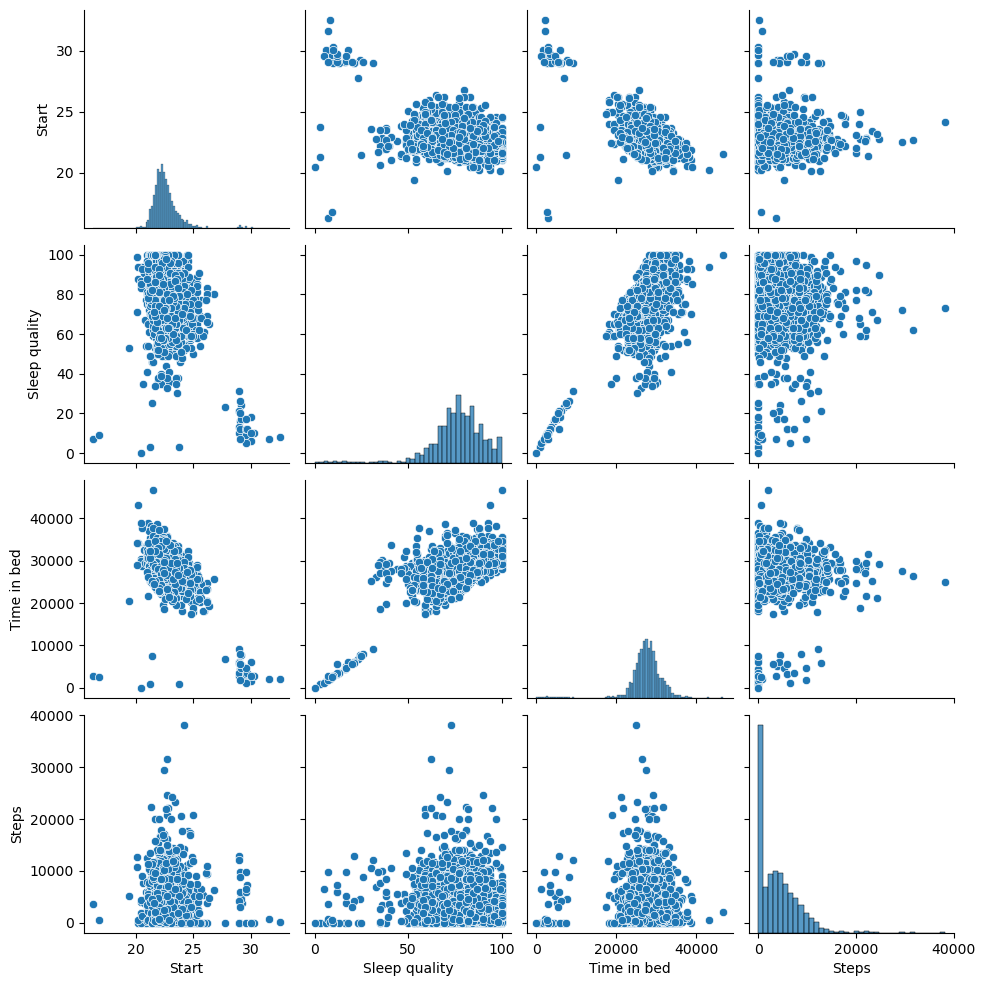

In [43]:
sns.pairplot(data)
plt.savefig("Pair plot")

Next, I will be plotting a heatmap for the correlation matrix.

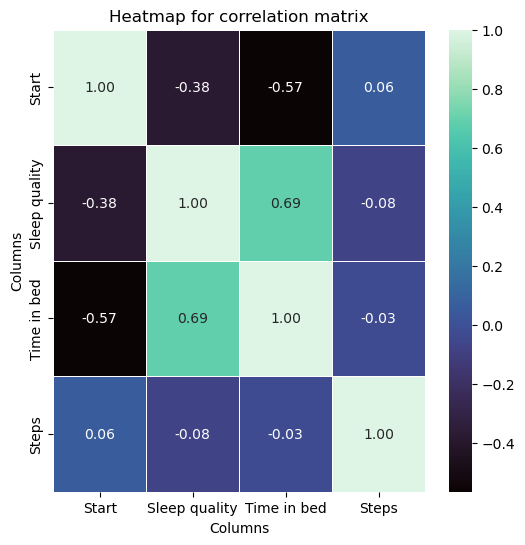

In [44]:
fig, ax = plt.subplots(figsize=(6,6))        
sns.heatmap(data.corr(), annot=True, linewidths=.5, cmap = "mako", fmt = ".2f", ax=ax)
plt.xlabel("Columns")
plt.ylabel("Columns")
plt.title("Heatmap for correlation matrix")
plt.savefig("Heatmap for correlation matrix")

There is clear correlation between "Time in bed" and "Sleep quality", as well as between "Start" and "Sleep quality". I will now be using linear regression on the model. I will use "Sleep quality" as the label, and the columns whose correlation with "Sleep quality" is greater or equal to 0.05 or smaller or equal to -0.05 as the features. Hence, our features are "Time in bed", "Steps", and "Start".

In [45]:
linRe = LinearRegression()
X = data[["Time in bed", "Start", "Steps"]]
y = data["Sleep quality"]
linRe.fit(X,y)
y_pred = linRe.predict(X)

We now plot the predicted value of y against y to see how linear regression performs in this case.

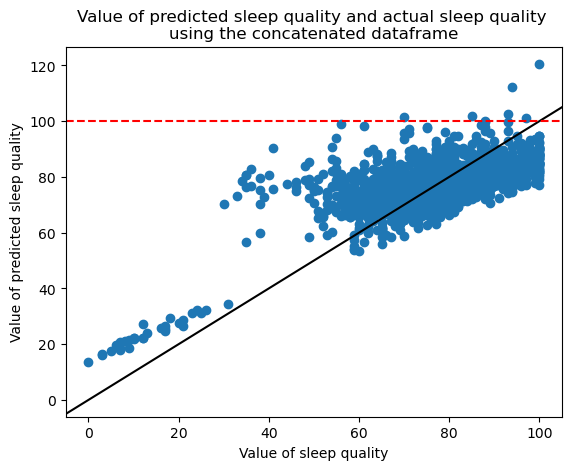

In [46]:
fig, ax = plt.subplots()
ax.scatter(y, y_pred)
ax.axline((0, 0), slope=1, color = "black")
ax.axhline(y=100, color="red", linestyle="--")
plt.xlabel("Value of sleep quality")
plt.ylabel("Value of predicted sleep quality")
plt.title("Value of predicted sleep quality and actual sleep quality \nusing the concatenated dataframe")
plt.savefig("Value of predicted sleep quality and actual sleep quality")
error = mean_squared_error(y, y_pred)

In [47]:
print(f"Value of mean squared error: {error}")

Value of mean squared error: 106.370063004047


This means the real values and predicted values are on average around 10% apart. We can conclude that the linear regression model can be used in predicting sleep quality from the start of the sleep time, the number of steps, and the time in bed.

Let's see if how another machine learning model would perform with this dataframe. I will split the values for the sleep quality and categorise them binarily as worse sleep or better sleep - represented by 0 and 1 respectively.

In [48]:
threshold = data["Sleep quality"].median()
data["Sleep quality"] = (data["Sleep quality"] >= threshold).astype(int)
data.head()

,Start,Sleep quality,Time in bed,Steps
0,22.950000,1,30720.0,0
1,21.283333,0,960.0,0
2,22.700000,1,30600.0,0
3,22.516667,0,27120.0,0
4,22.200000,0,24240.0,0


I will now use a logistic regression model. I will use the same label and features I used for linear regression.

In [49]:
logRe = LogisticRegression(max_iter = 2000, C = 50)
X_2 = data[["Start", "Time in bed", "Steps"]]
y_2 = data["Sleep quality"]
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.2, random_state=42)
logRe.fit(X_train, y_train)
y_pred2 = logRe.predict(X_test)
accuracy = accuracy_score(y_test, y_pred2)
precision = precision_score(y_test, y_pred2)
print(f"The accuracy score for the Logistic Regression model is {accuracy}, while the precision score for this model is {precision}.")

The accuracy score for the Logistic Regression model is 0.6712707182320442, while the precision score for this model is 0.6530612244897959.


Let's look at the confusion matrix.

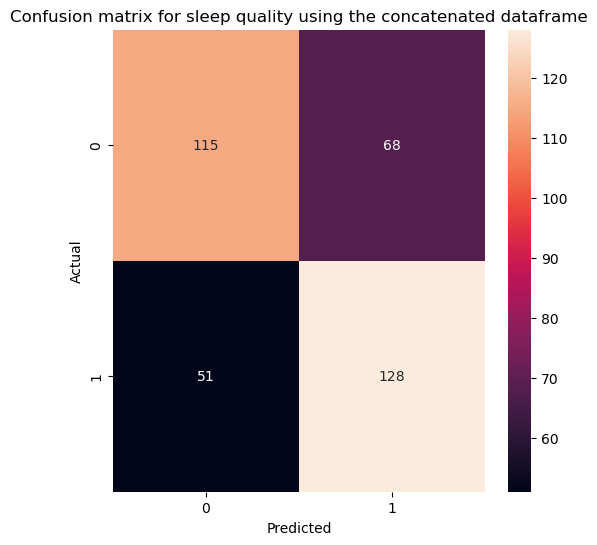

In [50]:
conma = confusion_matrix(y_test, y_pred2)
plt.figure(figsize=(6, 6))
sns.heatmap(conma, annot=True, fmt="g", cmap="rocket")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion matrix for sleep quality using the concatenated dataframe")
plt.savefig("Confusion matrix for sleep quality the concatenated dataframe")

Looking at the correlation matrix for dataframe 2, I can see that there are more columns whose correlation with "Sleep quality" is great or equal to 0.05 or smaller or equal to -0.05. I will first be using linear regression on this dataframe and see if the model performs better. In this case, the features will be "Time before sleep (seconds)", "Time asleep (seconds)", "Time in bed", "Movements per hour", "Alarm mode", "Steps", "Regularity", and "Start".

In [51]:
linRe2 = LinearRegression()
X12 = df2[["Time before sleep (seconds)", "Time asleep (seconds)", "Time in bed", "Movements per hour", "Alarm mode", "Steps", "Regularity", "Start"]]
y12 = df2["Sleep quality"]
linRe2.fit(X12,y12)
y_pred12 = linRe2.predict(X12)

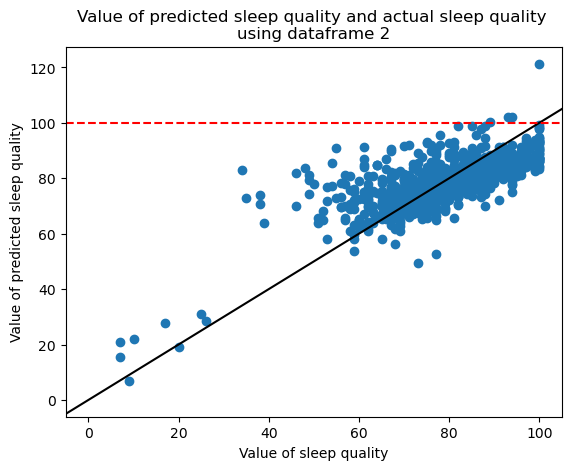

In [52]:
fig2, ax2 = plt.subplots()
ax2.scatter(y12, y_pred12)
ax2.axline((0, 0), slope=1, color = "black")
ax2.axhline(y=100, color="red", linestyle="--")
plt.xlabel("Value of sleep quality")
plt.ylabel("Value of predicted sleep quality")
plt.title("Value of predicted sleep quality and actual sleep quality \nusing dataframe 2")
plt.savefig("Value of predicted sleep quality and actual sleep quality 2")
error12 = mean_squared_error(y12, y_pred12)

In [53]:
print(f"Value of mean squared error: {error12}")

Value of mean squared error: 79.38379316030482


This means the real values and predicted values are on average around a bit less than 9% apart. We can conclude that the linear regression model works better with dataframe 2.

In [54]:
threshold = df2["Sleep quality"].median()
df2["Sleep quality"] = (df2["Sleep quality"] >= threshold).astype(int)
df2.head()

,Start,Sleep quality,Regularity,Steps,Alarm mode,Movements per hour,Time in bed,Time asleep (seconds),Time before sleep (seconds),Did snore,Snore time,Weather temperature (°C)
0,23.433333,0,0,8350,1,35.0,24289.2,22993.8,161.9,True,92.0,0.0
1,22.166667,0,0,4746,1,78.6,28810.2,25160.9,192.1,False,0.0,0.0
2,21.716667,1,96,4007,1,60.5,30461.5,28430.8,203.1,True,74.0,0.0
3,23.183333,0,92,6578,1,45.2,25327.6,23132.5,168.9,False,0.0,0.0
4,23.200000,1,94,4913,1,44.6,25698.4,22614.6,171.3,True,188.0,0.0


In [55]:
logRe2 = LogisticRegression(max_iter = 2000, C = 50)
X_22 = df2[["Time before sleep (seconds)", "Time asleep (seconds)", "Time in bed", "Movements per hour", "Alarm mode", "Steps", "Regularity", "Start"]]
y_22 = df2["Sleep quality"]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_22, y_22, test_size=0.2, random_state=42)
logRe2.fit(X_train2, y_train2)
y_pred22 = logRe2.predict(X_test2)
accuracy2 = accuracy_score(y_test2, y_pred22)
precision2 = precision_score(y_test2, y_pred22)
print(f"The accuracy score for the Logistic Regression model is {accuracy2}, while the precision score for this model is {precision2}.")

The accuracy score for the Logistic Regression model is 0.7513513513513513, while the precision score for this model is 0.7938144329896907.


Let's look at the confusion matrix.

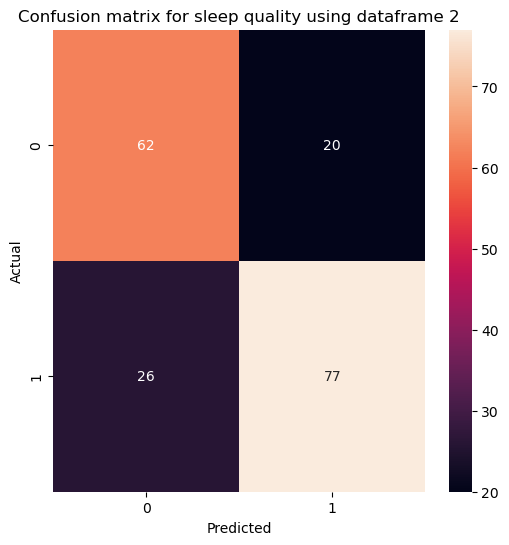

In [56]:
conma2 = confusion_matrix(y_test2, y_pred22)
plt.figure(figsize=(6, 6))
sns.heatmap(conma2, annot=True, fmt="g", cmap="rocket")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion matrix for sleep quality using dataframe 2")
plt.savefig("Confusion matrix for sleep quality using dataframe 2")

We can also see that logistic regression model works better for dataframe 2.